<a href="https://colab.research.google.com/github/chungbinpark/ML-tutorial/blob/main/2_1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 모델 설계하기- 폐암 수술환자의 생존율 예측하기

### 1. 환경 준비

In [ ]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [ ]:
# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 10.50 MiB/s, done.
Resolving deltas: 100% (9/9), done.


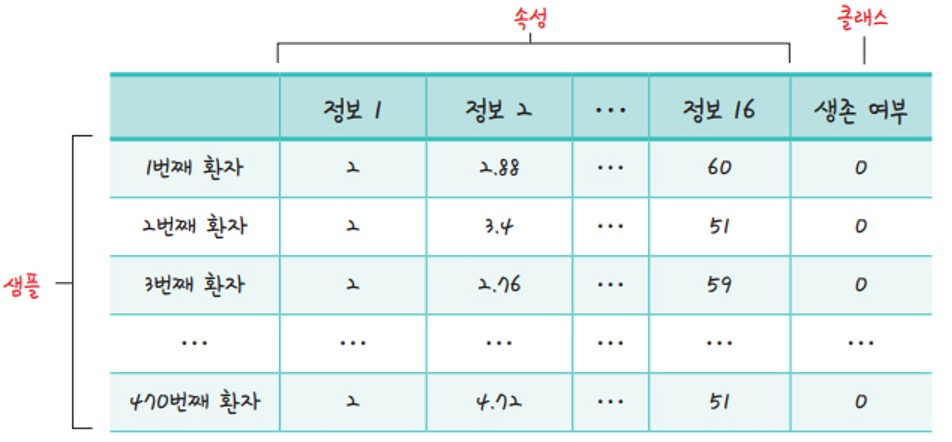

In [ ]:
np.shape(Data_set)

In [ ]:
X = Data_set[:,0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

In [ ]:
np.shape(X)

(470, 16)

In [ ]:
np.shape(y)

(470,)

### 3. 구조 결정

In [ ]:
# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


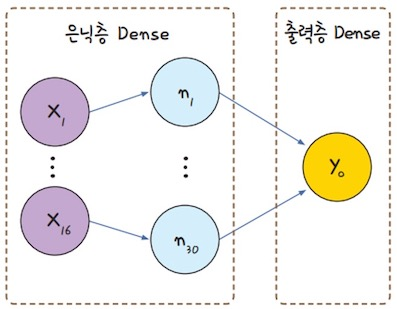

### 4. 모델 실행



*   epoch: 학습 프로세스 횟수 (1 epoch: 모든 샘플 한번 사용)
*   batch_size: 전체 데이터 중 한 번 학습에 넣을 데이터 수



*   batch 수 = (전체 데이터 샘플/batch_size) = 가중치 업데이트 횟수










In [ ]:
# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8374 - loss: 0.5948
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8679 - loss: 0.4051
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8917 - loss: 0.3709
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8576 - loss: 0.4197
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.4552
